###### *Importing Libraries*

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

###### *Download and view head of data table*

In [2]:
#import data (10 year time frame)
gold_data = pd.read_csv("Datasets/gold_data.csv")
silver_data = pd.read_csv("Datasets/silver_data.csv")
gas_data = pd.read_csv("Datasets/natural_gas_data.csv")
oil_data = pd.read_csv("Datasets/crude_oil_data.csv")
coffee_data = pd.read_csv("Datasets/coffee_data.csv")
corn_data = pd.read_csv("Datasets/corn_data.csv")

In [3]:
gold_data = gold_data.set_index('Date')
silver_data = silver_data.set_index('Date')
gas_data = gas_data.set_index('Date')
oil_data = oil_data.set_index('Date')
coffee_data = coffee_data.set_index('Date')
corn_data = corn_data.set_index('Date')

###### *Combining all the data into one commodity*
I will be using the Commodity column to create a categorical column that indicates which commodity each row corresponds to.

In [4]:
gold_data['Commodity']='gold'
silver_data['Commodity']='silver'
gas_data['Commodity']='gas'
oil_data['Commodity']='oil'
coffee_data['Commodity']='coffee'
corn_data['Commodity']='corn'
commodity_data = pd.concat([gold_data, silver_data, gas_data, oil_data, coffee_data, corn_data])
commodity_data.head()

,Open,High,Low,Close,Adj Close,Volume,Commodity
Date,,,,,,,
2012-10-16,1736.699951,1744.699951,1736.599976,1744.699951,1744.699951,15,gold
2012-10-17,1749.400024,1751.500000,1746.000000,1751.500000,1751.500000,36,gold
2012-10-18,1749.099976,1749.099976,1740.500000,1743.300049,1743.300049,27,gold
2012-10-19,1741.099976,1741.099976,1721.000000,1722.800049,1722.800049,70,gold
2012-10-22,1715.000000,1728.300049,1715.000000,1725.099976,1725.099976,12,gold


###### *Cleaning data to remove any null values*

###### *Plotting the closing price graph of the commodity*

Text(0, 0.5, 'Prices ($)')

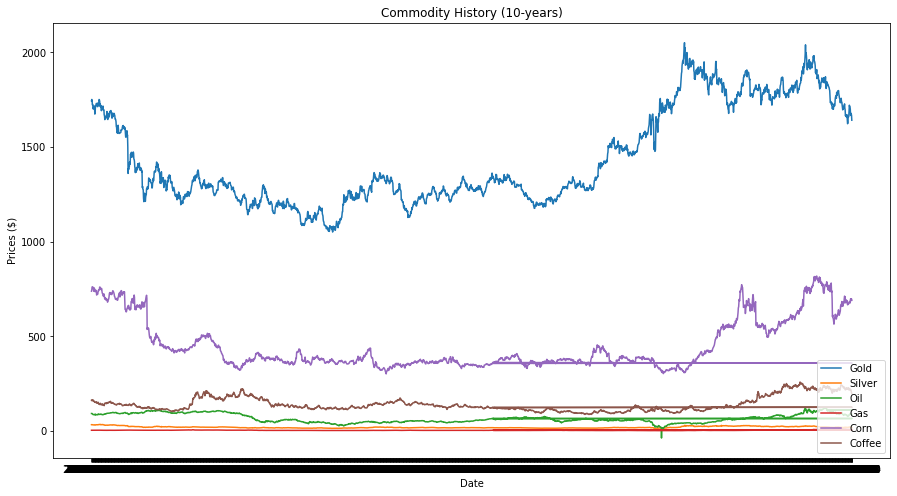

In [5]:
plt.figure(figsize=(15, 8))
plt.title('Commodity History (10-years)')
plt.plot(gold_data['Close'])
plt.plot(silver_data['Close'])
plt.plot(oil_data['Close'])
plt.plot(gas_data['Close'])
plt.plot(corn_data['Close'])
plt.plot(coffee_data['Close'])
plt.legend(['Gold', 'Silver', 'Oil', 'Gas', 'Corn', 'Coffee' ], loc='lower right')
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [6]:
commodity_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
for i in range(1, 15):
    commodity_data['t-' + str(i)] = commodity_data['Close'].shift(i)
    
commodity_data.head()

,Close,Commodity,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,,,,,,,,,,
2012-10-16,1744.699951,gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-17,1751.500000,gold,1744.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-18,1743.300049,gold,1751.500000,1744.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-19,1722.800049,gold,1743.300049,1751.500000,1744.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-22,1725.099976,gold,1722.800049,1743.300049,1751.500000,1744.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(commodity_data.isnull().sum()) #check how many null values are in out dataset
commodity_data.dropna(inplace=True)
commodity_data.head()

Close         0
Commodity     0
t-1           1
t-2           2
t-3           3
t-4           4
t-5           5
t-6           6
t-7           7
t-8           8
t-9           9
t-10         10
t-11         11
t-12         12
t-13         13
t-14         14
dtype: int64


,Close,Commodity,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,,,,,,,,,,
2012-11-07,1713.199951,gold,1714.099976,1682.199951,1674.099976,1714.099976,1717.500000,1710.900024,1712.000000,1700.500000,1708.300049,1725.099976,1722.800049,1743.300049,1751.500000,1744.699951
2012-11-08,1725.400024,gold,1713.199951,1714.099976,1682.199951,1674.099976,1714.099976,1717.500000,1710.900024,1712.000000,1700.500000,1708.300049,1725.099976,1722.800049,1743.300049,1751.500000
2012-11-09,1730.300049,gold,1725.400024,1713.199951,1714.099976,1682.199951,1674.099976,1714.099976,1717.500000,1710.900024,1712.000000,1700.500000,1708.300049,1725.099976,1722.800049,1743.300049
2012-11-12,1730.300049,gold,1730.300049,1725.400024,1713.199951,1714.099976,1682.199951,1674.099976,1714.099976,1717.500000,1710.900024,1712.000000,1700.500000,1708.300049,1725.099976,1722.800049
2012-11-13,1724.199951,gold,1730.300049,1730.300049,1725.400024,1713.199951,1714.099976,1682.199951,1674.099976,1714.099976,1717.500000,1710.900024,1712.000000,1700.500000,1708.300049,1725.099976


In [8]:
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
commodity_data['Close'] = scaler.fit_transform(commodity_data[['Close']])
commodity_data[['t-1', 't-2', 't-3', 't-4','t-5', 't-6','t-7', 't-8','t-9', 't-10','t-11', 't-12', 't-13', 't-14']] = scaler.fit_transform(commodity_data[['t-1', 't-2', 't-3', 't-4','t-5', 't-6','t-7', 't-8','t-9', 't-10','t-11', 't-12', 't-13', 't-14']])

# Split data into train and test sets
X = commodity_data.drop(['Close', 'Commodity'], axis=1)
y = commodity_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Reshape input data
X_train = X_train.values # convert to numpy array
X_train = X_train.reshape((X_train.shape[0], 14, 1)) # reshape to 3D tensor
X_test = X_test.values # convert to numpy array
X_test = X_test.reshape((X_test.shape[0], 14, 1)) # reshape to 3D tensor

In [9]:
#X_train = tf.expand_dims(X_train, 2)
#X_test = tf.expand_dims(X_test, 2)
print("x_train size and shape: {}".format(X_train.shape))
print("y_train size and shape: {}".format(y_train.shape))
print("x_test size and shape: {}".format(X_test.shape))
print("y_test size and shape: {}".format(y_test.shape))


x_train size and shape: (12056, 14, 1)
y_train size and shape: (12056,)
x_test size and shape: (3015, 14, 1)
y_test size and shape: (3015,)


The <u>input sequence length</u> (seq_len) in our code is determined by the window_size variable, which is set to 14. This means that each input sequence consists of the previous 14 days of close prices.

There is no <u>start token</u> (label_len) in our code. A start token is often used in natural language processing tasks to indicate the beginning of a sequence, but it is not relevant in this case.

The <u>prediction sequence length</u> (pred_len) in my code is 1, since I am using the previous 14 days of close prices to predict the close price on the next day.
<br>

###### *Creating our Model:*

In [10]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(14, 1)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In a neural network, dropout is a regularization technique that helps prevent overfitting by randomly dropping out (i.e., setting to zero) a certain fraction of the neurons in the network during training. This has the effect of reducing the capacity of the network and forcing it to learn multiple independent representations of the data, which can improve generalization to unseen data. In this example, dropout is added after the first and second LSTM layers, with a rate of 0.2 (i.e., 20% of the neurons will be dropped out during training). You can adjust the rate to control the amount of dropout applied to the model. A higher rate will result in more dropout and a lower capacity model, while a lower rate will result in less dropout and a higher capacity model.<br>
<br>
In a neural network, a dense layer (also known as a fully-connected layer) is a layer that performs a linear transformation on the input data using a set of weights and biases. Each neuron in a dense layer receives input from all the neurons in the previous layer and produces an output that is passed to all the neurons in the next layer. In my code, the dense layer has 25 neurons and is added after the second LSTM layer. The output of this layer is passed to the next layer, which is a single neuron dense layer that produces the final output of the model.
<br>
<br>

###### *Training the model*

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
377/377 [==============================] - 3s 4ms/step - loss: 0.0014
Epoch 2/10
377/377 [==============================] - 1s 4ms/step - loss: 4.0903e-04
Epoch 3/10
377/377 [==============================] - 1s 4ms/step - loss: 3.8111e-04
Epoch 4/10
377/377 [==============================] - 1s 4ms/step - loss: 3.5690e-04
Epoch 5/10
377/377 [==============================] - 1s 4ms/step - loss: 3.6986e-04
Epoch 6/10
377/377 [==============================] - 1s 4ms/step - loss: 2.9256e-04
Epoch 7/10
377/377 [==============================] - 1s 4ms/step - loss: 2.3943e-04
Epoch 8/10
377/377 [==============================] - 1s 4ms/step - loss: 2.0885e-04
Epoch 9/10
377/377 [==============================] - 1s 4ms/step - loss: 1.9403e-04
Epoch 10/10
377/377 [==============================] - 2s 4ms/step - loss: 1.9368e-04


In [12]:
# Make predictions on test data
predictions = model.predict(X_test)

X = commodity_data.drop(['Close', 'Commodity'], axis=1)
X = X.values # convert to numpy array
X = X.reshape((X.shape[0], 14, 1)) # reshape to 3D tensor
commodity_data['t-15'] = model.predict(X)
commodity_data.head()

471/471 [==============================] - 1s 2ms/step


,Close,Commodity,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15
Date,,,,,,,,,,,,,,,,,
2012-11-07,0.838067,gold,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.856400,0.853145,0.837209
2012-11-08,0.843906,gold,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.856400,0.837414
2012-11-09,0.846252,gold,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.838528
2012-11-12,0.846252,gold,0.846252,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.840098
2012-11-13,0.843332,gold,0.846252,0.846252,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.841828


In [13]:
# cols_to_scale = ['t-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10', 't-11', 't-12', 't-13', 't-14']
#commodity_data[cols_to_scale] = scaler.inverse_transform(commodity_data[cols_to_scale])

In [14]:
# #commodity_data['t-15'] = commodity_data['t-15'].reshape(-1, 1)
# commodity_data['t-15'] = scaler.inverse_transform(commodity_data['t-15'])
commodity_data.head()

,Close,Commodity,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15
Date,,,,,,,,,,,,,,,,,
2012-11-07,0.838067,gold,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.856400,0.853145,0.837209
2012-11-08,0.843906,gold,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.856400,0.837414
2012-11-09,0.846252,gold,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.852474,0.838528
2012-11-12,0.846252,gold,0.846252,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.842662,0.840098
2012-11-13,0.843332,gold,0.846252,0.846252,0.843906,0.838067,0.838497,0.823228,0.819351,0.838497,0.840125,0.836966,0.837492,0.831987,0.835721,0.843763,0.841828


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

r2 = r2_score(y_test, predictions)
print(r2)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(mse)
print(mae)

0.9967913222616714
0.00020373660477237925
0.004971391758449258


In [16]:
# import matplotlib.pyplot as plt

# # Select the commodity data for a single commodity
# commodity_name = 'gold'  # Replace this with the name of the commodity you want to plot
# commodity_data_subset = commodity_data[commodity_data['Commodity'] == commodity_name]

# # Get the original data and predictions for the commodity
# original_data = commodity_data_subset['Close']
# predictions = commodity_data_subset['t-15']

# # Plot the original data and predictions
# plt.figure(figsize=(16,8))
# plt.plot(original_data, label='Original Data')
# plt.plot(predictions, label='Predictions')

# # Add a legend and show the plot
# plt.legend()
# plt.show()

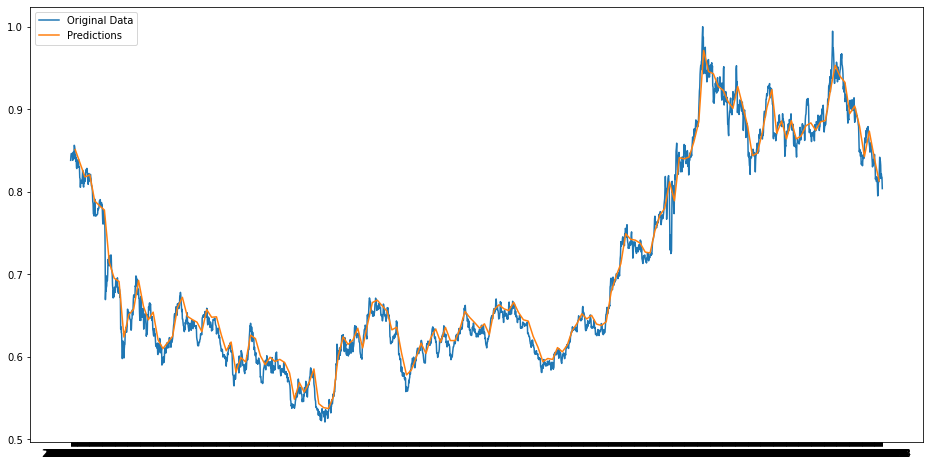

In [17]:
import matplotlib.pyplot as plt

# Select the commodity data for a single commodity
commodity_name = 'gold'  # Replace this with the name of the commodity you want to plot
commodity_data_subset = commodity_data[commodity_data['Commodity'] == commodity_name]

# Get the original data and predictions for the commodity
original_data = commodity_data_subset['Close']
predictions = commodity_data_subset['t-15']

# Get the index of the 15th day for each prediction
prediction_indices = commodity_data_subset.index[14::15]

# Select only the predictions made on the 15th day
predictions_15th_day = predictions[prediction_indices]

# Plot the original data and predictions
plt.figure(figsize=(16,8))
plt.plot(original_data, label='Original Data')
plt.plot(prediction_indices, predictions_15th_day, label='Predictions')

# Add a legend and show the plot
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Select the commodity data for all commodities
commodity_names = ['gold', 'silver', 'gas', 'oil', 'coffee', 'corn']  # Replace this with the names of the commodities you want to plot
commodity_data_subsets = [commodity_data[commodity_data['Commodity'] == commodity_name] for commodity_name in commodity_names]

# Get the original data and predictions for each commodity
original_data = [commodity_data_subset['Close'] for commodity_data_subset in commodity_data_subsets]
predictions = [commodity_data_subset['t-15'] for commodity_data_subset in commodity_data_subsets]

# Get the index of the 15th day for each prediction
prediction_indices = [commodity_data_subset.index[14::15] for commodity_data_subset in commodity_data_subsets]

# Select only the predictions made on the 15th day
predictions_15th_day = [predictions[i][prediction_indices[i]] for i in range(len(predictions))]

# Plot the original data and predictions for each commodity
plt.figure(figsize=(16,8))
for i in range(len(commodity_names)):
    plt.plot(original_data[i], label=f'{commodity_names[i]} Original Data')
    plt.plot(prediction_indices[i], predictions_15th_day[i], label=f'{commodity_names[i]} Predictions')

# Add a legend and show the plot
plt.legend()
plt.show()